In [1]:
import requests
import json
import numpy as np
import datetime

In [2]:
# Defining the functions i will use for this notebook

# method to get the date string from the day in the year
def get_date_wanted(day, year):
    
    start_dt = datetime.datetime(year,1,1)
    change_to_date = datetime.timedelta(days = (day-1))
    date = start_dt + change_to_date
    rand = date.strftime("%d/%m/%Y")
    
    return rand

#  Method to get the half-hourly electricity prices from the start date to the end date
def exact_elec_prices(start_day, start_month, start_year, end_day, end_month, end_year):

    # start point
    start_year = start_year
    start_month = f"{int(start_month):02d}"
    start_day = f"{int(start_day):02d}"
    start_time = '00:30'

    # end point
    end_year = end_year
    end_month = f"{int(end_month):02d}"
    end_day = f"{int(end_day):02d}"
    end_time = '00:30'

    start_point = start_year + '-' + start_month + '-' + start_day +'T' + start_time + 'Z'
    end_point = end_year + '-' + end_month + '-' + end_day +'T' + end_time + 'Z'

    response = requests.get('https://api.octopus.energy/v1/products/AGILE-18-02-21/electricity-tariffs/E-1R-AGILE-18-02-21-C/standard-unit-rates/?period_from=' + start_point + '&period_to=' + end_point)

    response = response.json()

    if len(response['results']) == 48:
        elec_price = np.zeros(48)
        for n in range(48):
            elec_price[n] = response['results'][n]['value_inc_vat']
        elec_price = elec_price[::-1]   # reversing the array as thats the format the data is in
        return elec_price
    else:
        return 'Not enough data for 24 Hours'
    



# simplified version above where only the day is specified     
def elec_prices(day):
    year = 2020
    
    # code to get the start date from the day in the year
    start_date = get_date_wanted(day, year)
    start_day, start_month, start_year = start_date.split('/')
    
    # code to get the end date from the day in the year
    end_date = get_date_wanted(day+1, year)
    end_day, end_month, end_year = end_date.split('/')
    
    prices = exact_elec_prices(start_day, start_month, start_year, end_day, end_month, end_year)
    
    return prices

(0.0, 21.691096867275704)

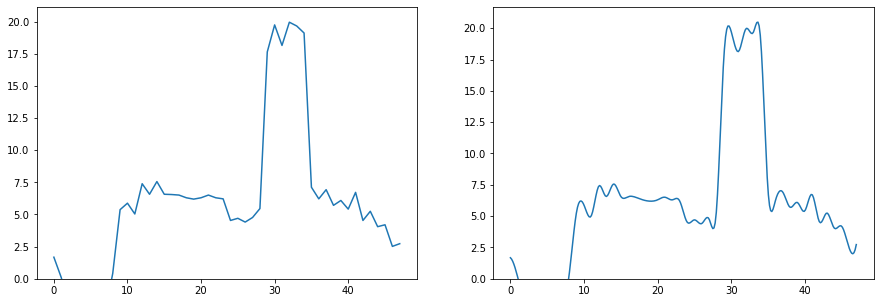

In [5]:
# change k to change the order of the plot


day = 181

prices = elec_prices(day)

T = np.array([n for n in range(len(prices))])

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T, prices, k=3)  # type: BSpline
power_smooth = spl(xnew)



fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=[15,5])

ax[0].plot(prices)
ax[0].set_ylim(0)

ax[1].plot(xnew, power_smooth)
ax[1].set_ylim(0)

In [4]:
get_date_wanted(181, 2020)

'29/06/2020'